In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mplsoccer.pitch import Pitch

from scipy.spatial import ConvexHull
from scipy   import stats

In [9]:
df= pd.read_csv(r'C:\Users\SG\Downloads\convextutorial.csv')
df=df.fillna(0)

df['y']=0.8*df['y']
df['x']=1.2*df['x']

In [10]:
df

,eventId,minute,second,teamId,x,y,playerId,type/displayName,type/value
0,2,0,0.0,65,0.00,0.00,0.0,Start,32
1,2,0,0.0,833,0.00,0.00,0.0,Start,32
2,3,0,1.0,833,60.96,41.20,303800.0,Pass,1
3,4,0,4.0,833,34.08,46.72,316957.0,Pass,1
4,5,0,7.0,833,79.92,19.76,303800.0,BallTouch,61
...,...,...,...,...,...,...,...,...,...
1576,1018,92,7.0,65,0.00,0.00,0.0,End,30
1577,1019,0,0.0,65,0.00,0.00,0.0,End,30
1578,676,0,0.0,833,0.00,0.00,0.0,End,30
1579,1,0,0.0,65,0.00,0.00,0.0,FormationSet,34


In [11]:
df=df[df['teamId']==65]

In [12]:
df

,eventId,minute,second,teamId,x,y,playerId,type/displayName,type/value
0,2,0,0.0,65,0.00,0.00,0.0,Start,32
5,3,0,8.0,65,33.48,64.48,5.0,BallRecovery,49
6,4,0,9.0,65,36.72,51.44,5.0,Pass,1
7,5,0,13.0,65,31.68,17.92,28.0,Pass,1
8,6,0,18.0,65,35.04,30.16,4.0,Pass,1
...,...,...,...,...,...,...,...,...,...
1569,1016,92,3.0,65,110.64,50.40,17.0,Dispossessed,50
1574,1017,92,6.0,65,90.72,66.80,5.0,Interception,8
1576,1018,92,7.0,65,0.00,0.00,0.0,End,30
1577,1019,0,0.0,65,0.00,0.00,0.0,End,30


In [13]:
df['playerId']=df['playerId'].astype(int)
players=df['playerId'].unique()
players

<ipython-input-13-3031c1a168c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['playerId']=df['playerId'].astype(int)


array([ 0,  5, 28,  4, 23,  7, 11, 21,  1,  9, 18, 16, 17, 12])

In [14]:
starters= players[1:12]

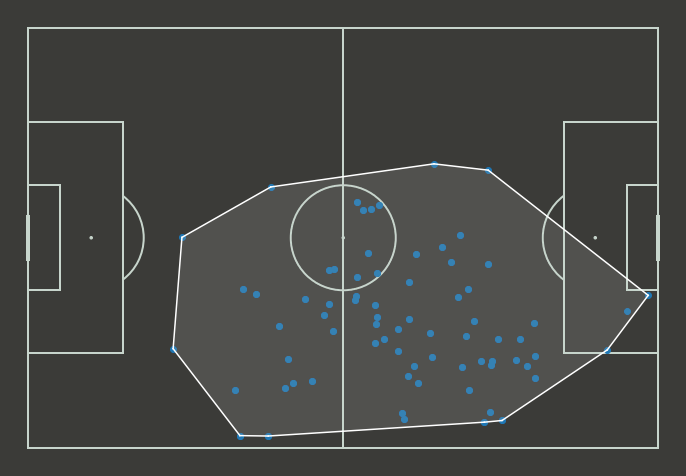

In [20]:
fig, ax=plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#3b3b38')
ax.patch.set_facecolor('#3b3b38')

pitch=Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#3b3b38', line_color='#c7d5cc', figsize=(13,8), constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

df1 =df[df['playerId']==21]
df1 =df1[df1['type/value']==1]

df1 =df1[(np.abs(stats.zscore(df1[['x','y']]))<2)]

points =df1[['x','y']].values
hull=ConvexHull(df1[['x','y']])

plt.scatter(df1.x,df1.y)
for i in hull.simplices:
    plt.plot(points[i,0],points[i,1],'white')
    plt.fill(points[hull.vertices,0],points[hull.vertices,1],c='white',alpha=0.01)

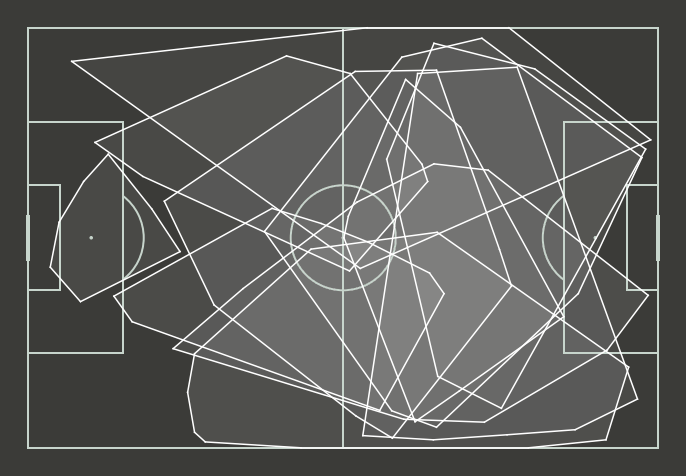

In [25]:
fig, ax=plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#3b3b38')
ax.patch.set_facecolor('#3b3b38')

pitch=Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#3b3b38', line_color='#c7d5cc', figsize=(13,8), constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for player in starters:
    
    df2=df[df['playerId']==player]
    df2 =df2[df2['type/value']==1]
    
    df2 =df2[(np.abs(stats.zscore(df2[['x','y']]))<1)]
    
    points =df2[['x','y']].values
    
    try:
        hull=ConvexHull(df2[['x','y']])
    except:
        pass
    
    try:
        for i in hull.simplices:
            plt.plot(points[i,0],points[i,1],'white')
            plt.fill(points[hull.vertices,0],points[hull.vertices,1],c='white',alpha=0.01) 
    except:
        pass
    